In [128]:
# library for the files on computer
from os import listdir

# Data Manipulation 
import numpy as np
import pandas as pd

# Plot libraries
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from matplotlib import animation
from matplotlib import cm

In [ ]:
# Format modification
plt.rcParams.update({'mathtext.default':  'regular' })
sns.set(context='paper',style="whitegrid",font='Times New Roman',font_scale=1.2)

In [129]:
# Obtain the ends of the txt files
onlyfiles = [f for f in listdir('./') if f.endswith('txt')]

# Create dataframes
dataframes = [pd.read_csv(file) for file in onlyfiles]


# Define the limits for each element analysis
c=[295,280]
o=[541,520]
si=[110,97]

In [130]:
# Filter the dataframes for each element
df_c = [surv[(surv.BE<c[0]) & (surv.BE>c[1])] for surv in dataframes]
df_o = [surv[(surv.BE<o[0]) & (surv.BE>o[1])] for surv in dataframes]
df_si = [surv[(surv.BE<si[0]) & (surv.BE>si[1])] for surv in dataframes]

In [63]:
# This is needed to generate a  3D plot for the survey 
survey=[]
for data in dataframes:
    value_verts=[]
    for i in range(len(list(data.BE))):
        z=(float(list(data['BE'])[i]),float(list(data['counts/s'])[i]))
        value_verts.append(z)
    survey.append(value_verts)

In [86]:
# This is needed to generate a  3D plot for the Carbon element 

carbon=[]
for data in df_c:
    value_verts=[]
    for i in range(len(list(data.BE))):
        z=(float(list(data['BE'])[i]),float(list(data['counts/s'])[i]))
        value_verts.append(z)
    carbon.append(value_verts)

In [168]:
# This is needed to generate a  3D plot for the Oxygen element 

oxygen=[]
for data in df_o:
    value_verts=[]
    for i in range(len(list(data.BE))):
        z=(int(list(data['BE'])[i]),float(list(data['counts/s'])[i]))
        value_verts.append(z)
    oxygen.append(value_verts)

In [88]:
# This is needed to generate a  3D plot for the Silicon element 

silicon=[]
for data in df_si:
    value_verts=[]
    for i in range(len(list(data.BE))):
        z=(float(list(data['BE'])[i]),float(list(data['counts/s'])[i]))
        value_verts.append(z)
    silicon.append(value_verts)

In [97]:
# By hand plug in the values for etching time
zs =[0,625,825,1025,1325,1525,1725,1925,2125,2325,
     2475,2775,3075,3375,3675,4275,5475,6075,6675,7275,7875,8475]


In [ ]:
# Color palette for the graphs
COLORS = sns.color_palette("ch:2.5,-.2,dark=.3", n_colors=len(dataframes))
COLORS2 = list(reversed(sns.color_palette('inferno',n_colors=len(dataframes))))

<IPython.core.display.Javascript object>


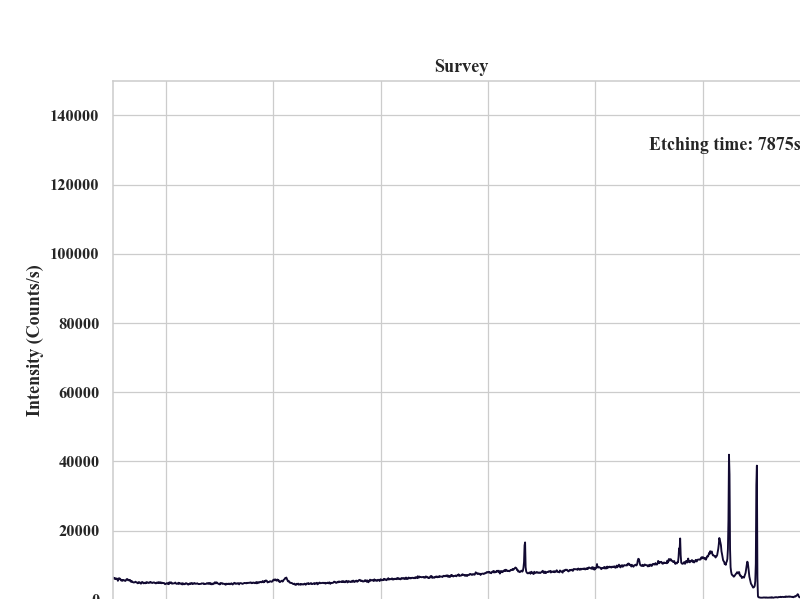

In [165]:
# Create an animation for each survey
%matplotlib notebook

# Create a figure
fig= plt.figure(figsize=(8,6))

# Add an Ax
ax1 = fig.add_subplot(111)

# Plot the initial values and the text
plot1, = ax1.plot(dataframes[0].BE,dataframes[0]['counts/s'])
plot2 = ax1.text(300,130000,f'Etching time: {zs[0]}s')

# Add the graphs complements
ax1.set_title('Survey')
ax1.set_xlim([1300, 0])
ax1.set_xlabel('Binding Energy (eV)')
ax1.set_ylim([0.0, 150000])
ax1.set_ylabel('Intensity (Counts/s)')

# Function to animate
def animate(i):
    plot2.set_text(f'Etching time: {zs[i]}s')
    plot1.set_data(dataframes[i].BE,dataframes[i]['counts/s'])
    plot1.set_color(COLORS2[i])
    
# Generate the animation
ani = animation.FuncAnimation(fig, animate,interval = 500 ,frames=len(zs), repeat=True)
plt.show()

# Save the image
Writer = animation.writers['imagemagick']
writer = Writer(fps=3)
ani.save("./energy3.gif", writer=writer)

<IPython.core.display.Javascript object>


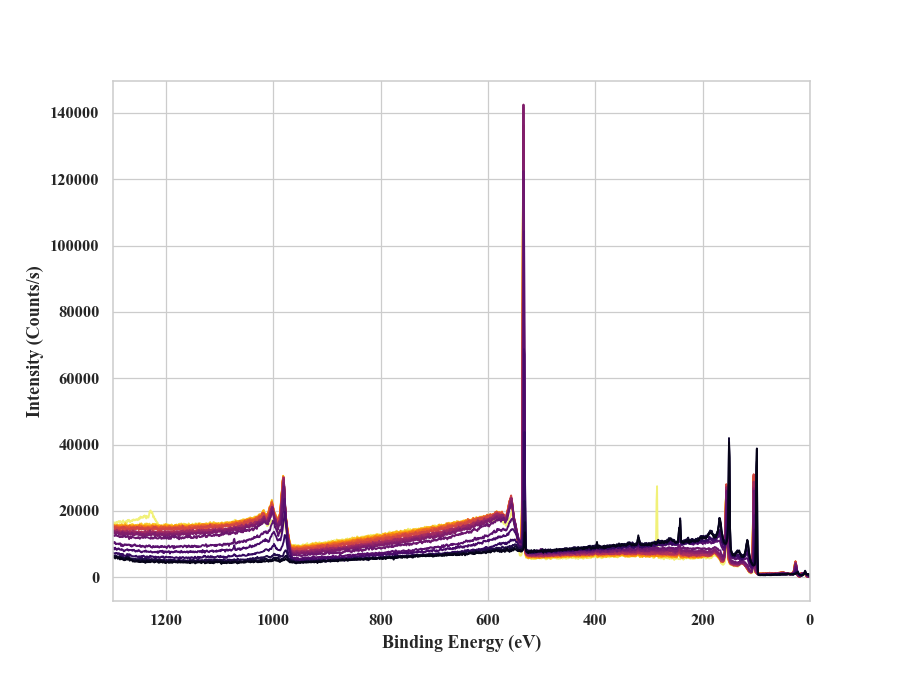

In [152]:
# Print all the grpahs at once to see if it is a nice visualization
fig= plt.figure(figsize=(8,6))
for i,data in enumerate(dataframes):
    plt.plot(data.BE, data['counts/s'], c=COLORS2[i], label = f'Etching time: {zs[i]}')
plt.xlim(1300,0)
plt.xlabel('Binding Energy (eV)')
plt.ylabel('Intensity (Counts/s)')
plt.show()

<IPython.core.display.Javascript object>


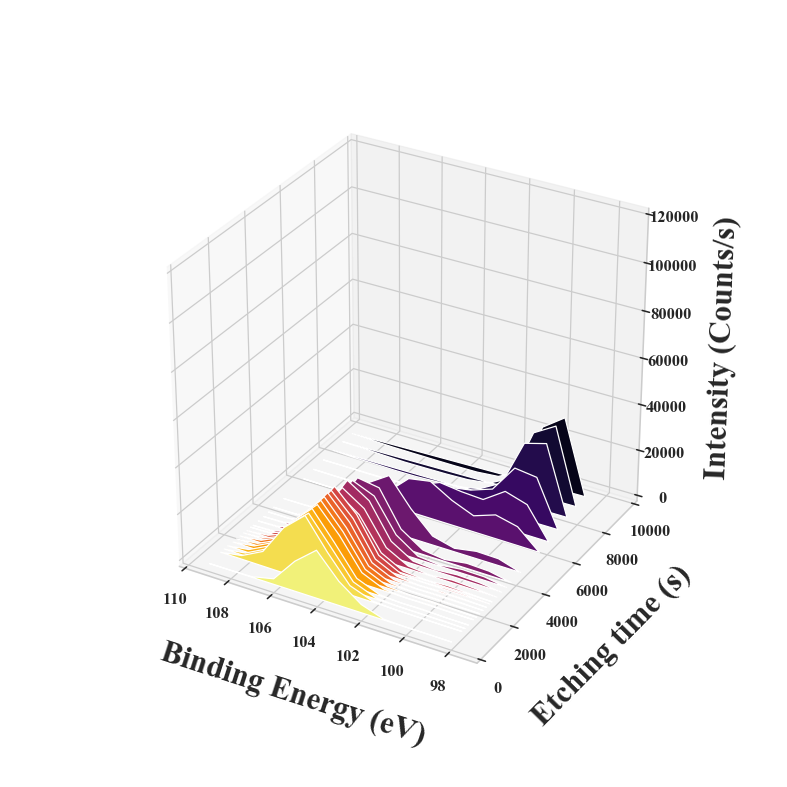

In [166]:
#3D graphs for Silicon section of the survey
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')

poly = PolyCollection(silicon,facecolors=COLORS2)
ax.add_collection3d(poly, zs=zs, zdir='y')
ax.set_xlabel('Binding Energy (eV)', fontsize=20)
ax.set_xlim3d(si[0], si[1])
ax.set_ylabel('Etching time (s)', fontsize=20)
ax.set_ylim3d(0, 10000)
ax.set_zlabel('Intensity (Counts/s)',fontsize=20)
ax.set_zlim3d(0, 120000)

ax.xaxis.labelpad=15
ax.yaxis.labelpad=15
ax.zaxis.labelpad=15

plt.show()

<IPython.core.display.Javascript object>


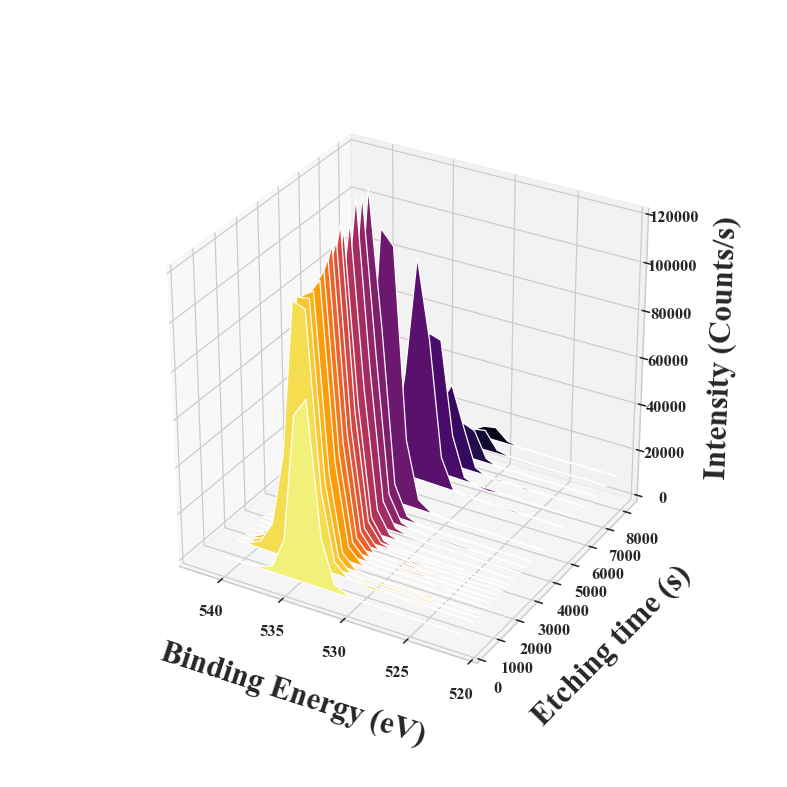

In [175]:
#3D graph for Oxygen section of the survey
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')

poly = PolyCollection(oxygen,facecolors=COLORS2)
ax.add_collection3d(poly, zs=zs, zdir='y')
ax.set_xlabel('Binding Energy (eV)', fontsize=20)
ax.set_xlim3d(o[0]+2, o[1])
ax.set_ylabel('Etching time (s)', fontsize=20)
ax.set_ylim3d(0, 8475)
ax.set_zlabel('Intensity (Counts/s)',fontsize=20)
ax.set_zlim3d(0, 120000)

ax.xaxis.labelpad=15
ax.yaxis.labelpad=15
ax.zaxis.labelpad=15

plt.show()


<IPython.core.display.Javascript object>


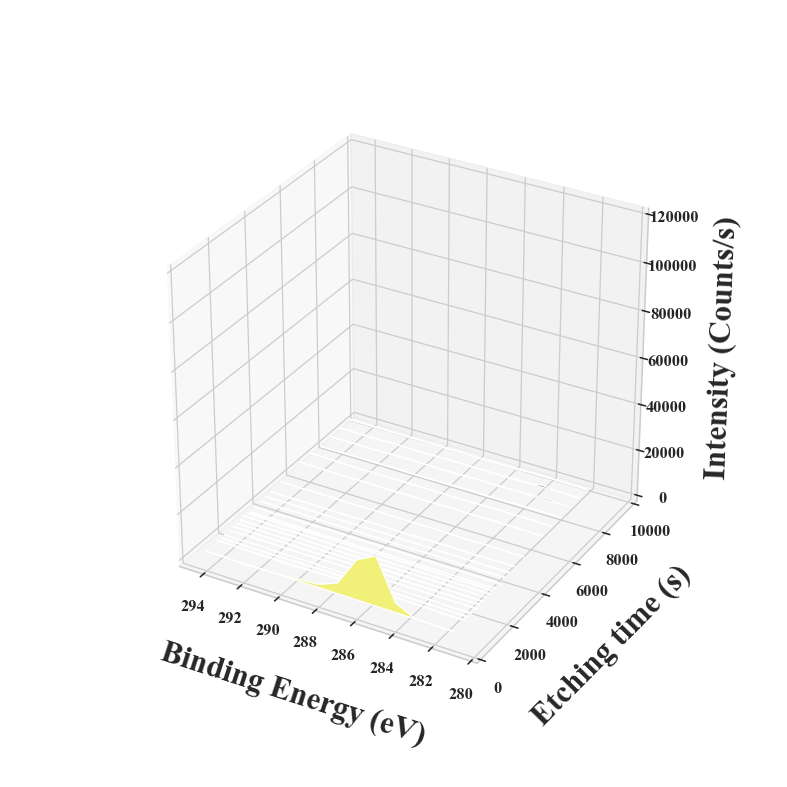

In [176]:
#3D graph for Carbon section of the survey
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')

poly = PolyCollection(carbon,facecolors=COLORS2)
ax.add_collection3d(poly, zs=zs, zdir='y')
ax.set_xlabel('Binding Energy (eV)', fontsize=20)
ax.set_xlim3d(c[0], c[1])
ax.set_ylabel('Etching time (s)', fontsize=20)
ax.set_ylim3d(0, 10000)
ax.set_zlabel('Intensity (Counts/s)',fontsize=20)
ax.set_zlim3d(0, 120000)

ax.xaxis.labelpad=15
ax.yaxis.labelpad=15
ax.zaxis.labelpad=15

plt.show()